In [1]:
import ast 
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

df["job_posted_data"] = pd.to_datetime(df["job_posted_date"])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_DA_PL = df[(df["job_title"] == "Data Analyst") & (df["job_country"] == "Poland")].copy()

In [3]:
df_DA_PL = df_DA_PL.dropna(subset=["salary_year_avg"])

df_DA_PL_exploded = df_DA_PL.explode("job_skills")

In [4]:
df_DA_skills = df_DA_PL_exploded.groupby("job_skills")["salary_year_avg"].agg(["count", "median"]).sort_values(by="count", ascending=False)

df_DA_skills = df_DA_skills.rename(columns={"count": "skills_count", "median": "median_salary"})

dA_job_count = len(df_DA_PL)

df_DA_skills["skill_percent"] = df_DA_skills["skills_count"] / dA_job_count * 100

skill_precent = 30

df_DA_skills_high_demand = df_DA_skills[df_DA_skills["skill_percent"] > skill_precent]
df_DA_skills_high_demand

,skills_count,median_salary,skill_percent
job_skills,,,
python,3,102500.0,75.0
sql,2,106837.5,50.0
excel,2,77757.0,50.0
tableau,2,106837.5,50.0


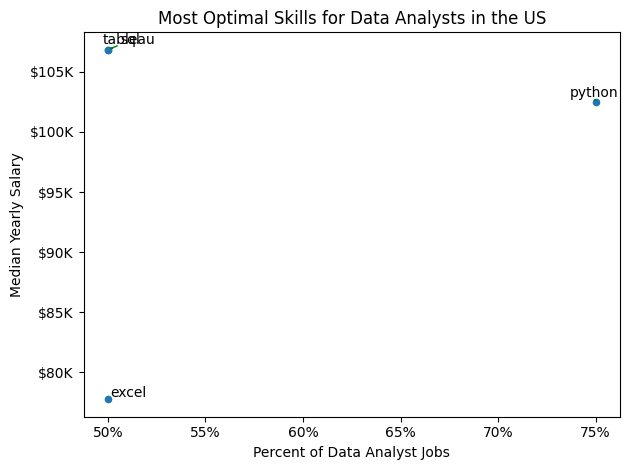

In [5]:
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

df_DA_skills_high_demand.plot(kind="scatter", x='skill_percent', y='median_salary')

texts = []

for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand["skill_percent"].iloc[i], df_DA_skills_high_demand["median_salary"].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle="->", color="g", lw=1))
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"${int(y/1000)}K"))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.xlabel("Percent of Data Analyst Jobs")
plt.ylabel("Median Yearly Salary")
plt.title('Most Optimal Skills for Data Analysts in the US')
plt.tight_layout()
plt.show()

In [6]:
df_technology = df['job_type_skills'].copy()

df_technology = df_technology.drop_duplicates()
df_technology = df_technology.dropna()

technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)
    for key, value in row_dict.items():
        if key in technology_dict:
            technology_dict[key] += value
        else:
            technology_dict[key] = value

for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

In [7]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns=["technology", "skills"])

df_technology = df_technology.explode("skills")

In [8]:
df_plot = df_DA_skills_high_demand.merge(df_technology, left_on="job_skills", right_on="skills")

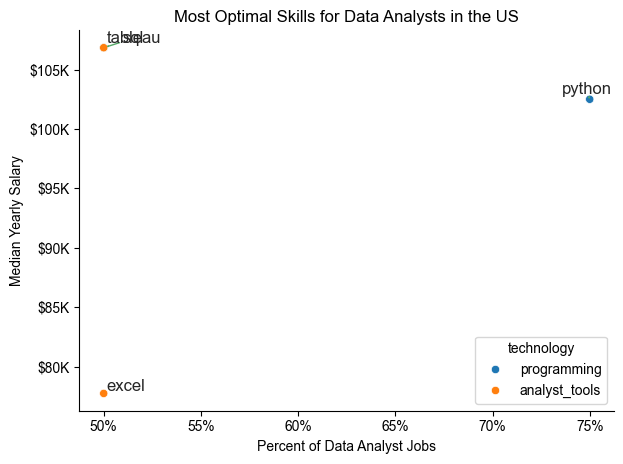

In [9]:
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

# df_plot.plot(kind="scatter", x='skill_percent', y='median_salary')
sns.scatterplot(data=df_plot, x="skill_percent", y="median_salary", hue="technology")

sns.despine()
sns.set_theme(style="ticks")

texts = []

for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand["skill_percent"].iloc[i], df_DA_skills_high_demand["median_salary"].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle="->", color="g", lw=1))
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"${int(y/1000)}K"))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.xlabel("Percent of Data Analyst Jobs")
plt.ylabel("Median Yearly Salary")
plt.title('Most Optimal Skills for Data Analysts in the US')
plt.tight_layout()
plt.show()